In [2]:
! pip install ModulationPy

In [3]:
! pip install scikit-commpy

     |████████████████████████████████| 52 kB 668 kB/s 
  Created wheel for scikit-commpy: filename=scikit_commpy-0.7.0-py3-none-any.whl size=58556 sha256=29a2ffb1d6ea2351ed2bd6b48a99cb4153c45081d7a9a17c7994c149caee55a1
  Stored in directory: /root/.cache/pip/wheels/52/2a/a2/2daff6a2d5e3b96d70fb03e5b0699ce70c98cb4c00c8107c38
Successfully built scikit-commpy


In [4]:
import ModulationPy as mpy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import commpy
from commpy.channels import awgn
from scipy import stats

In [5]:
matplotlib.style.available
matplotlib.style.use('seaborn-whitegrid')

In [823]:
M = 4
SNR = 50
N = 4096
modulator = mpy.QAMModem(M,
                         bin_input=False,
                         )
qam_signals_df = pd.DataFrame()

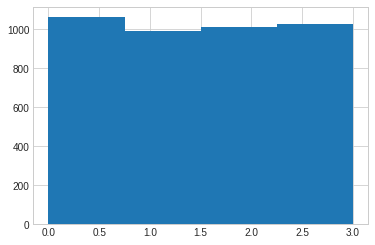

In [824]:
consq = np.random.randint(M, size=N)
plt.hist(consq, bins = M);
# Показать распределение точек используя битовую последовательность и последовательность цифр 

In [825]:
QAM = modulator.modulate(consq)
QAM = awgn(QAM, SNR)
QAM = QAM/max(abs(QAM))
# QAM = QAM*np.exp(np.pi*1j)
sqam = 'QAM_'+str(M)+'_'+str(SNR)

In [826]:
qam_signals_df[sqam] = QAM

In [827]:
len(qam_signals_df.index)

4096

In [828]:
from scipy.stats.kde import gaussian_kde

In [829]:
qam_reals_abs = qam_signals_df.apply(np.real).apply(abs).dropna()

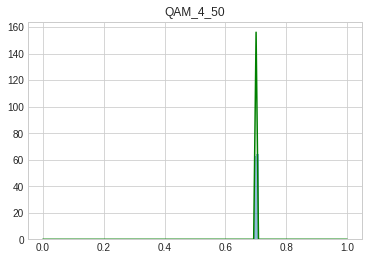

In [830]:
qam_reals_abs.hist(bins=int(np.log2(M)), density=True, alpha=0.5)
my_density = gaussian_kde(qam_reals_abs[sqam], bw_method = 0.05) # Какую длину выбрать?
# x = np.linspace(qam_reals_abs[sqam].min(), qam_reals_abs[sqam].max(), N)
x = np.linspace(0, 1, int((N**(1/2))*2)) # Обьяснить децимацию ядерной оценки
N_density = int((N**(1/2)))*2
plt.plot(x, my_density(x),'g'); # distribution function

In [831]:
len(my_density(x))

128

In [832]:
int((N_density**(1/2)))

11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


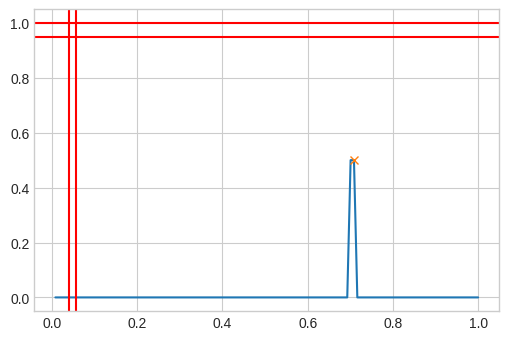

(4, 2)

In [833]:
from scipy.signal import find_peaks

derivation = np.array(my_density(x))
derivation = derivation/max(derivation)
mean_of_derivation = np.mean(derivation)
max_of_derivation = np.max(derivation)

derivation = pd.Series(derivation).rolling(window=2).mean().values

x_values = np.array(x)
distance =  int((N_density*0.707/16)/2)
maxima = np.array(find_peaks(derivation, distance=distance, prominence=(0.05, 1)))
maxima = maxima[0]
plt.figure(dpi=100)
plt.plot(x_values, derivation)
plt.plot(x_values[maxima], derivation[maxima], "x")
plt.axvline(x_values[5], c='red')
plt.axvline(x_values[5 + distance], c='red')
plt.axhline(1, c='red')
plt.axhline(0.95, c='red')
plt.show()
len(maxima)*4*len(maxima), distance

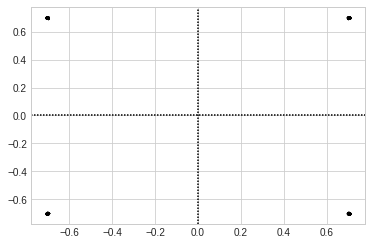

In [834]:
plt.scatter(qam_signals_df.apply(np.imag), 
            qam_signals_df.apply(np.real),
            c='black',
            marker='.',
            s=1)

# plt.scatter(qam_signals_df.apply(abs), 
#             qam_signals_df.apply(abs),
#             c='blue',
#             marker='*',
#             s=20)

plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))

# Измерение статистически значимого различия между сигналами с разным отношением Сигнал/Шум

In [ ]:
SNR = 50
SNR1 = 50
list_of_snr = [SNR]
M = 4
consq =  np.arange(0, M).repeat(10)
modulator = mpy.QAMModem(M,
                          bin_input=False,
                          )
while SNR1 != 0:

 

  QAM1 = modulator.modulate(consq)
  QAM1 = QAM1/max(abs(QAM1))
  QAM2 = QAM1
  QAM1 = awgn(QAM1, SNR)
  QAM2 = awgn(QAM2, SNR1)

  test_result = stats.ttest_rel(QAM1.real, QAM2.real)[1]

  print(test_result, SNR, SNR1)

  if test_result >= 0.05:
    SNR = SNR1
    list_of_snr.append(SNR)
    SNR1 = SNR1 - 1
  else: 
    SNR1 = SNR1 - 1

In [ ]:
list_of_snr

# использование метода k-means для нахождения кластеров 

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [ ]:
SNR = 100
M = 256
consq = np.arange(0, M).repeat(2)
modulator = mpy.QAMModem(M,
                          bin_input=False,
                          )
QAM1 = modulator.modulate(consq)
# QAM1 = QAM1/max(abs(QAM1))

QAM1 = awgn(QAM1, SNR)

QAM1 = pd.Series(QAM1)
plt.scatter(QAM1.apply(np.imag), 
            QAM1.apply(np.real),
            c='black',
            marker='.',
            s=1)

plt.axhline(0, c='black', dashes=(1, 1))
plt.axvline(0, c='black', dashes=(1, 1))

# kmeans = KMeans(n_clusters = M)
# kmeans.fit(X)
# kmeans.labels_

X = pd.DataFrame({'imag':QAM1.apply(np.imag), 'real':QAM1.apply(np.real)})
y = pd.Series(consq)

link = hierarchy.linkage(X, 'ward', 'euclidean')
plt.figure(figsize=(12,9))
dn = hierarchy.dendrogram(link, orientation='right')

In [ ]:
errors = []

for i in [3, 4, 15, 16, 63, 64, 255, 256]:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  errors.append(kmeans.inertia_)

result = {'4':errors[0]-errors[1], '16':errors[2]-errors[3], '64':errors[4]-errors[5], '256':errors[6]-errors[7]}

max(result, key=result.get)

result, errors